<a href="https://colab.research.google.com/github/6kitty/IP01069/blob/main/%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2023111394_%EC%9C%A1%EC%9D%80%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.makedirs(os.path.expanduser('~/Downloads'), exist_ok=True)
!curl -L -o ~/Downloads/elliptic-data-set.zip\
  https://www.kaggle.com/api/v1/datasets/download/ellipticco/elliptic-data-set

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  146M  100  146M    0     0  17.4M      0  0:00:08  0:00:08 --:--:-- 22.6M


In [2]:
!unzip ~/Downloads/elliptic-data-set.zip

Archive:  /root/Downloads/elliptic-data-set.zip
  inflating: elliptic_bitcoin_dataset/elliptic_txs_classes.csv  
  inflating: elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv  
  inflating: elliptic_bitcoin_dataset/elliptic_txs_features.csv  


In [3]:
import pandas as pd

tsx_classes = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
print(tsx_classes.head())

tsx_edgelist = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
print(tsx_edgelist.head())

tsx_features = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)
print(tsx_features.head())

        txId    class
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  230459870
3  230333930  230595899
4  232013274  232029206
         0    1         2         3         4          5         6    \
0  230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

        7          8         9    ...       157       158       159       160  \
0 -0.113002  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369   
1 -0.113002  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556   
2 -0.113002  -0.061584 -0.162749  ...  0.670883 

In [4]:
tsx_features.rename(columns={0: 'txId'}, inplace=True)
data = pd.merge(tsx_classes, tsx_features, on='txId', how='left')
print(data.head())

# unknown 제거
data = data[data['class'] != 'unknown'].copy()
print(data.shape)

# class(합법, 불법) 1과 0으로 설정
data['class'] = data['class'].map({'1': 1, '2': 0})
print(data.head())

        txId    class  1         2         3         4          5         6  \
0  230425980  unknown  1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458  unknown  1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460  unknown  1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397        2  1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314  unknown  1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

          7          8  ...       157       158       159       160       161  \
0 -0.113002  -0.061584  ... -0.562153 -0.600999  1.461330  1.461369  0.018279   
1 -0.113002  -0.061584  ...  0.947382  0.673103 -0.979074 -0.978556  0.018279   
2 -0.113002  -0.061584  ...  0.670883  0.439728 -0.979074 -0.978556 -0.098889   
3  9.782742  12.414558  ... -0.577099 -0.613614  0.241128  0.241406  1.072793   
4  1.312656  -0.061584  ... -0.511871 -0.400422  0.517257  0.579382  0.018279   

        162       163       164       

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=['txId', 'class'])
y = data['class']

# 전처리 : StandardScaler
ss = StandardScaler()
scaled_features = ss.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA

# 전처리 : PCA
pca = PCA(n_components=50)
pca_features = pca.fit_transform(scaled_features)


X_train, X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 모델 선정 : RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = rf_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12606
           1       0.97      0.74      0.84      1364

    accuracy                           0.97     13970
   macro avg       0.97      0.87      0.91     13970
weighted avg       0.97      0.97      0.97     13970



In [9]:
!pip install networkx

In [11]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# networkX로 거래 네트워크 생성한 데이터셋 구축
classes = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
edgelist = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
features = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

features.rename(columns={0: 'txId'}, inplace=True)

classes = classes[classes['class'] != 'unknown'].copy()
classes['class'] = classes['class'].map({'1': 1, '2': 0})

G = nx.from_pandas_edgelist(edgelist, 'txId1', 'txId2', create_using=nx.DiGraph())

target_nodes = set(classes['txId'])

# 구조적 특징 1: 자금의 유입/유출량 척도
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)

# 구조적 특징 2: PageRank(네트워크 내 중요도)
pagerank = nx.pagerank(G, alpha=0.85)

graph_features = pd.DataFrame({
    'txId': list(G.nodes()),
    'in_degree': [in_degree.get(n, 0) for n in G.nodes()],
    'out_degree': [out_degree.get(n, 0) for n in G.nodes()],
    'pagerank': [pagerank.get(n, 0) for n in G.nodes()]
})


data = pd.merge(classes, features, on='txId', how='left')
data = pd.merge(data, graph_features, on='txId', how='left')

X = data.drop(columns=['txId', 'class'])
y = data['class']

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12606
           1       1.00      0.87      0.93      1364

    accuracy                           0.99     13970
   macro avg       0.99      0.93      0.96     13970
weighted avg       0.99      0.99      0.99     13970



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        42,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,969 (328.00 KB)

 Trainable params: 83,969 (328.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9150 - accuracy: 0.9368 - loss: 0.1792 - val_AUC: 0.9690 - val_accuracy: 0.9719 - val_loss: 0.0979
Epoch 2/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.9707 - accuracy: 0.9718 - loss: 0.0931 - val_AUC: 0.9744 - val_accuracy: 0.9742 - val_loss: 0.0896
Epoch 3/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.9791 - accuracy: 0.9755 - loss: 0.0832 - val_AUC: 0.9744 - val_accuracy: 0.9764 - val_loss: 0.0836
Epoch 4/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9814 - accuracy: 0.9772 - loss: 0.0756 - val_AUC: 0.9734 - val_accuracy: 0.9770 - val_loss: 0.0844
Epoch 5/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9824 - accuracy: 0.9770 - loss: 0.0750 - val_AUC: 0.9756 - val_accuracy: 0.9770 - val_loss: 0.0844
Epoch 6/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9873 - accuracy: 0.9782 - loss: 0.0682 - val_AUC: 0.9801 - val_accuracy: 0.9788 - val_loss: 0.0762
Epoch 7/100
437/437 ━━━━━━━━━━━━━━

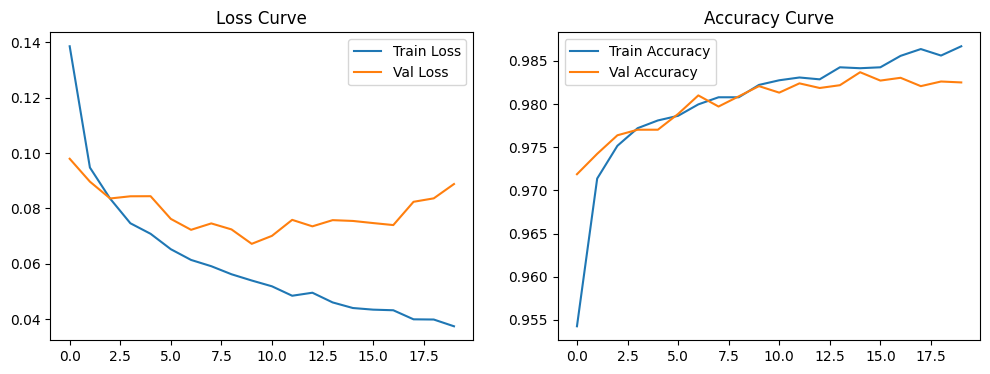

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8404
           1       0.97      0.84      0.90       909

    accuracy                           0.98      9313
   macro avg       0.98      0.92      0.94      9313
weighted avg       0.98      0.98      0.98      9313



In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# 딥러닝 : DNN
classes = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
features = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

features.rename(columns={0: 'txId'}, inplace=True)
classes = classes[classes['class'] != 'unknown'].copy()
classes['class'] = classes['class'].map({'1': 1, '2': 0}) # 1: 불법, 0: 합법

data = pd.merge(classes, features, on='txId', how='left')

X = data.drop(columns=['txId', 'class']).values
y = data['class'].values

# 훈련/검증/테스트 6:2:2
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

# 전처리 : StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 모델 설계
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_model(X_train_scaled.shape[1])
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
# Early Stopping
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
    monitor='val_loss'
)

# Model Checkpoint
checkpoint_cb = callbacks.ModelCheckpoint(
    "best_fraud_detection_model.keras",
    save_best_only=True,
    monitor='val_loss'
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping_cb, checkpoint_cb],
    verbose=1
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))